In [1]:
!pip install opencv-python


In [2]:
import cv2
print(cv2.__version__)





4.12.0


In [3]:
!pip install tensorflow keras opencv-python-headless==4.7.0.72 numpy pandas matplotlib scikit-learn


  Using cached opencv_python_headless-4.7.0.72-cp37-abi3-win_amd64.whl.metadata (18 kB)
Using cached opencv_python_headless-4.7.0.72-cp37-abi3-win_amd64.whl (38.1 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\VERNA\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [4]:
import os
print(os.getcwd())





C:\Users\VERNA


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = r"D:\Facial Emotion Detection 02\train"


train_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2,
  
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)


val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)



Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


INPUT_SHAPE = (48, 48, 1) 
NUM_CLASSES = 7  

model = Sequential([
    
    Conv2D(64, (3,3), activation='relu', input_shape=INPUT_SHAPE),
    BatchNormalization(), 
    MaxPooling2D(2,2),

    
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    
    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), 


    Dense(NUM_CLASSES, activation='softmax') 
])


model.summary()

C:\Users\VERNA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896,775 (3.42 MB)

 Trainable params: 895,879 (3.42 MB)

 Non-trainable params: 896 (3.50 KB)

In [6]:
 history = model.fit(...)' call was missing in your previous block.

history = model.fit(
    train_data, 
    validation_data=val_data, 
    epochs=50, 
    callbacks=[early_stopping_callback] 
)

C:\Users\VERNA\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 127s 174ms/step - accuracy: 0.2438 - loss: 1.8906 - val_accuracy: 0.2688 - val_loss: 1.7800
Epoch 2/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 105s 146ms/step - accuracy: 0.2931 - loss: 1.7325 - val_accuracy: 0.2566 - val_loss: 1.7467
Epoch 3/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 108s 151ms/step - accuracy: 0.3235 - loss: 1.6476 - val_accuracy: 0.3311 - val_loss: 1.6848
Epoch 4/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 113s 158ms/step - accuracy: 0.3570 - loss: 1.5949 - val_accuracy: 0.3289 - val_loss: 1.6622
Epoch 5/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 112s 156ms/step - accuracy: 0.3687 - loss: 1.5686 - val_accuracy: 0.2501 - val_loss: 1.8305
Epoch 6/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 116s 162ms/step - accuracy: 0.3907 - loss: 1.5263 - val_accuracy: 0.4057 - val_loss: 1.5284
Epoch 8/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 114s 159ms/step - accuracy: 0.3986 - loss: 1.5147 - val_accuracy: 0.3048 - val_loss: 1.7238
Epoch 9/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 123s 171ms/step - accuracy: 0.4102 -

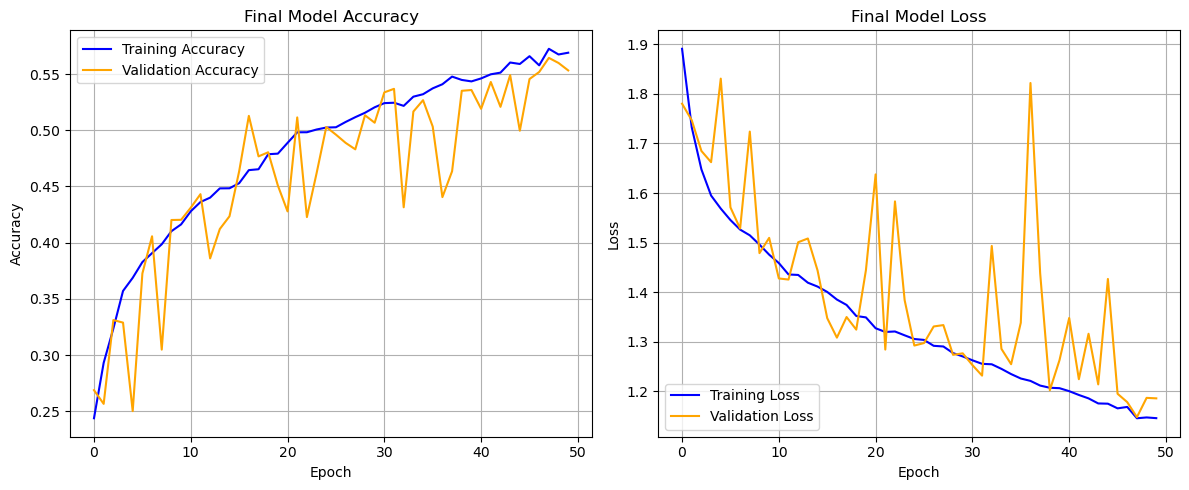

In [9]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side-by-side (1 row, 2 columns)
plt.figure(figsize=(12, 5))

# --- Subplot 1: Accuracy ---
plt.subplot(1, 2, 1) 

# Plot Training and Validation Accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Final Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Subplot 2: Loss ---
plt.subplot(1, 2, 2)

# Plot Training and Validation Loss over epochs
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Final Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlap and show the plots
plt.tight_layout()
plt.show()

In [7]:

model.save('emotion_model_final_run_v4.keras') 
print("Model saved emotion_model_final_run_v4.keras ")

Model saved emotion_model_final_run_v4.keras 


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


TEST_DIR = r"D:\Facial Emotion Detection 02\test" 
IMAGE_SIZE = (48, 48)
BATCH_SIZE = 32

# --- 2. Create Test Data Generator ---
# Only rescaling (normalization) is applied to the test data.
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the data into the 'test_data' variable
# shuffle=False is crucial for accurate evaluation and reports.
test_data = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False 
)

print("\n✅ Test dataset loaded successfully into 'test_data' variable.")

Found 7178 images belonging to 7 classes.

✅ Test dataset loaded successfully into 'test_data' variable.



✅ Model 'emotion_model_final_run_v4.keras' loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


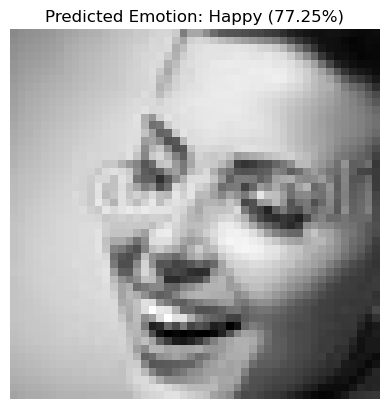


🎉 Model is RUNNING. Predicted Emotion: Happy
Confidence: 77.25%


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# --- 1. Set Variables ---
MODEL_PATH = 'emotion_model_final_run_v4.keras' 
# Your specific image path
IMAGE_PATH = r"D:\Facial Emotion Detection 02\test\happy\PrivateTest_2764941.jpg" 

# These labels must match the output order of your trained model
EMOTION_LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
TARGET_SIZE = (48, 48)

# --- 2. Load Model ---
try:
    model = tf.keras.models.load_model(MODEL_PATH)
    print(f"\n✅ Model '{MODEL_PATH}' loaded successfully.")
except Exception as e:
    print(f"\n❌ Error: Could not load the model. Check the file path. Error: {e}")
    exit()

# --- 3. Pre-process Image ---
try:
    # Load image in 48x48 grayscale mode
    img = image.load_img(IMAGE_PATH, target_size=TARGET_SIZE, color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0 # Normalization (0-1)

    # Create model input shape: (48, 48, 1) -> (1, 48, 48, 1)
    input_array = np.expand_dims(img_array, axis=0) 

except FileNotFoundError:
    print(f"\n❌ Error: Image file not found. Check the path is correct.")
    exit()
except Exception as e:
    print(f"\n❌ Error during image processing: {e}")
    exit()

# --- 4. Run Prediction ---
predictions = model.predict(input_array)
predicted_class_index = np.argmax(predictions[0])
predicted_emotion = EMOTION_LABELS[predicted_class_index]
confidence = predictions[0][predicted_class_index] * 100

# --- 5. Display Results ---
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Emotion: {predicted_emotion} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

print("\n=============================================")
print(f"🎉 Model is RUNNING. Predicted Emotion: {predicted_emotion}")
print(f"Confidence: {confidence:.2f}%")
print("=============================================")


✅ Model 'emotion_model_final_run_v4.keras' loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


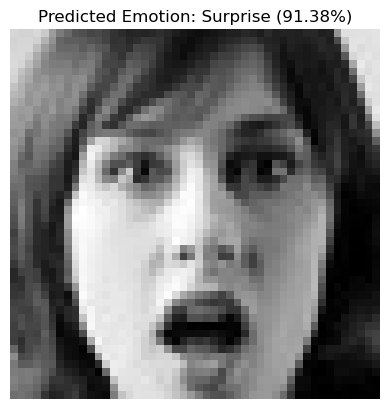


🎉 Model is RUNNING. Predicted Emotion: Surprise
Confidence: 91.38%


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# --- 1. Set Variables ---
MODEL_PATH = 'emotion_model_final_run_v4.keras' 
# Your specific image path
IMAGE_PATH = r"D:\Facial Emotion Detection 02\test\surprise\PrivateTest_2034433.jpg"

# These labels must match the output order of your trained model
EMOTION_LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
TARGET_SIZE = (48, 48)

# --- 2. Load Model ---
try:
    model = tf.keras.models.load_model(MODEL_PATH)
    print(f"\n✅ Model '{MODEL_PATH}' loaded successfully.")
except Exception as e:
    print(f"\n❌ Error: Could not load the model. Check the file path. Error: {e}")
    exit()

# --- 3. Pre-process Image ---
try:
    # Load image in 48x48 grayscale mode
    img = image.load_img(IMAGE_PATH, target_size=TARGET_SIZE, color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0 # Normalization (0-1)

    # Create model input shape: (48, 48, 1) -> (1, 48, 48, 1)
    input_array = np.expand_dims(img_array, axis=0) 

except FileNotFoundError:
    print(f"\n❌ Error: Image file not found. Check the path is correct.")
    exit()
except Exception as e:
    print(f"\n❌ Error during image processing: {e}")
    exit()

# --- 4. Run Prediction ---
predictions = model.predict(input_array)
predicted_class_index = np.argmax(predictions[0])
predicted_emotion = EMOTION_LABELS[predicted_class_index]
confidence = predictions[0][predicted_class_index] * 100

# --- 5. Display Results ---
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Emotion: {predicted_emotion} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

print("\n=============================================")
print(f"🎉 Model is RUNNING. Predicted Emotion: {predicted_emotion}")
print(f"Confidence: {confidence:.2f}%")
print("=============================================")


✅ Model 'emotion_model_final_run_v4.keras' loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


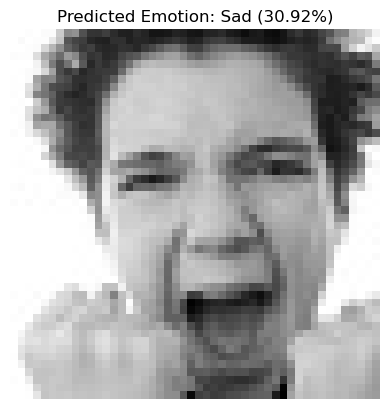


🎉 Model is RUNNING. Predicted Emotion: Sad
Confidence: 30.92%


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# --- 1. Set Variables ---
MODEL_PATH = 'emotion_model_final_run_v4.keras' 
# Your specific image path
IMAGE_PATH = r"D:\Facial Emotion Detection 02\test\angry\PrivateTest_4690573.jpg"

# These labels must match the output order of your trained model
EMOTION_LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
TARGET_SIZE = (48, 48)

# --- 2. Load Model ---
try:
    model = tf.keras.models.load_model(MODEL_PATH)
    print(f"\n✅ Model '{MODEL_PATH}' loaded successfully.")
except Exception as e:
    print(f"\n❌ Error: Could not load the model. Check the file path. Error: {e}")
    exit()

# --- 3. Pre-process Image ---
try:
    # Load image in 48x48 grayscale mode
    img = image.load_img(IMAGE_PATH, target_size=TARGET_SIZE, color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0 # Normalization (0-1)

    # Create model input shape: (48, 48, 1) -> (1, 48, 48, 1)
    input_array = np.expand_dims(img_array, axis=0) 

except FileNotFoundError:
    print(f"\n❌ Error: Image file not found. Check the path is correct.")
    exit()
except Exception as e:
    print(f"\n❌ Error during image processing: {e}")
    exit()

# --- 4. Run Prediction ---
predictions = model.predict(input_array)
predicted_class_index = np.argmax(predictions[0])
predicted_emotion = EMOTION_LABELS[predicted_class_index]
confidence = predictions[0][predicted_class_index] * 100

# --- 5. Display Results ---
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Emotion: {predicted_emotion} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

print("\n=============================================")
print(f"🎉 Model is RUNNING. Predicted Emotion: {predicted_emotion}")
print(f"Confidence: {confidence:.2f}%")
print("=============================================")

In [ ]:
import cv2
import tensorflow as tf
import numpy as np
import os

# --- 1. Set Variables ---
MODEL_PATH = 'emotion_model_final_run_v4.keras' 
TARGET_SIZE = (48, 48)
EMOTION_LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# --- 2. Load Model ---
try:
    model = tf.keras.models.load_model(MODEL_PATH)
    print(f"\n✅ Model '{MODEL_PATH}' loaded successfully.")
except Exception as e:
    print(f"\n❌ Error: Could not load the model. Error: {e}")
    exit()

# --- 3. Load Face Detection (Haar Cascade) ---
# This is a classic method for fast face detection
try:
    # Use cv2.data.haarcascades to ensure the path is correct
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    if face_cascade.empty():
        raise FileNotFoundError("Haar Cascade file not found.")
    print("✅ Face Detector loaded. Starting camera feed...")
except Exception as e:
    print(f"❌ Error: Could not load the face detector. Check OpenCV installation. Error: {e}")
    exit()

# --- 4. Access Camera ---
cap = cv2.VideoCapture(0) # 0 for the default camera

# --- 5. Real-Time Prediction Loop ---
while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame from camera.")
        break
        
    # Convert the color frame to grayscale for face detection and model input
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # Crop the region of interest (the face)
        roi_gray = gray_frame[y:y + h, x:x + w]
        
        # Pre-process for the model
        # 1. Resize to 48x48
        cropped_img = cv2.resize(roi_gray, TARGET_SIZE, interpolation=cv2.INTER_AREA)
        # 2. Add channel dimension: (48, 48) -> (48, 48, 1)
        input_array = np.expand_dims(cropped_img, axis=-1)
        # 3. Add batch dimension and normalize: (1, 48, 48, 1) / 255.0
        input_array = np.expand_dims(input_array, axis=0) / 255.0
        
        # Run Prediction
        predictions = model.predict(input_array, verbose=0)
        predicted_index = np.argmax(predictions[0])
        predicted_emotion = EMOTION_LABELS[predicted_index]
        confidence = predictions[0][predicted_index] * 100
        
        # Display the result on the frame
        text = f"{predicted_emotion} ({confidence:.2f}%)"
        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # Put the prediction text above the rectangle
        cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Show the video feed
    cv2.imshow('Real-Time Emotion Detector', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# --- 6. Release Resources ---
cap.release()
cv2.destroyAllWindows()


✅ Model 'emotion_model_final_run_v4.keras' loaded successfully.
✅ Face Detector loaded. Starting camera feed...


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# --- ভেরিয়েবল সেটআপ ---
INPUT_SHAPE = (48, 48, 3) # VGG16 এর জন্য ইনপুট সাইজ (48, 48) হলেও, এটি 3টি কালার চ্যানেল (RGB) আশা করে।
NUM_CLASSES = 7 
LEARNING_RATE = 0.0001 # ফাইন-টিউনিং এর জন্য লার্নিং রেট কম রাখা ভালো

# --- VGG16 বেস লোড ---
# weights='imagenet': ImageNet এ ট্রেইনড ওজন ব্যবহার করা হবে
# include_top=False: আউটপুট ক্লাসিফায়ার লেয়ার বাদ দেওয়া হবে
vgg_base = VGG16(weights='imagenet', 
                 include_top=False, 
                 input_shape=INPUT_SHAPE)

# VGG16 এর ওয়েটগুলোকে স্থির করুন (Freeze)
# যাতে ট্রেনিং এর সময় এর ওজন পরিবর্তন না হয়
vgg_base.trainable = False 

# --- নতুন মডেল তৈরি ---
transfer_model = Sequential([
    # ১. VGG16 কনভোলিউশনাল বেস যোগ
    vgg_base,
    
    # ২. ডেটা চ্যাপ্টা করুন
    Flatten(),
    
    # ৩. কাস্টম ক্লাসিফায়ার যোগ
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    # ৪. আউটপুট লেয়ার
    Dense(NUM_CLASSES, activation='softmax')
])

transfer_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,839 (56.64 MB)

 Trainable params: 133,639 (522.03 KB)

 Non-trainable params: 14,715,200 (56.13 MB)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# --- ডেটা জেনারেটর আপডেট: color_mode='rgb' ব্যবহার করুন ---
train_dir = r"D:\Facial Emotion Detection 02\train" 
IMAGE_SIZE = (48, 48)
BATCH_SIZE = 32

train_datagen_rgb = ImageDataGenerator(
    rescale=1./255,           
    validation_split=0.2,     
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_data_rgb = train_datagen_rgb.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='rgb', # ✨ এখানে পরিবর্তন করা হয়েছে ✨
    class_mode='categorical',
    subset='training'
)

val_data_rgb = train_datagen_rgb.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='rgb', # ✨ এখানে পরিবর্তন করা হয়েছে ✨
    class_mode='categorical',
    subset='validation'
)

# --- মডেল কম্পাইল ---
custom_adam = Adam(learning_rate=LEARNING_RATE)

transfer_model.compile(
    optimizer=custom_adam, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# --- আর্লি স্টপিং ---
early_stopping_callback = EarlyStopping(
    monitor='val_loss',         
    patience=10, 
    restore_best_weights=True   
)

# --- ট্রেনিং শুরু ---
print("\n🔥 transfer learing is starting...")
history = transfer_model.fit(
    train_data_rgb, 
    validation_data=val_data_rgb, 
    epochs=100, # উচ্চতর ইপক দেওয়া হয়েছে
    callbacks=[early_stopping_callback]
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.

🔥 transfer learing is starting...


C:\Users\VERNA\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 438s 607ms/step - accuracy: 0.2183 - loss: 2.3221 - val_accuracy: 0.3064 - val_loss: 1.7922
Epoch 2/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 247s 344ms/step - accuracy: 0.2765 - loss: 2.0006 - val_accuracy: 0.3433 - val_loss: 1.6964
Epoch 3/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 234s 326ms/step - accuracy: 0.2990 - loss: 1.8905 - val_accuracy: 0.3477 - val_loss: 1.6551
Epoch 4/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 229s 318ms/step - accuracy: 0.3026 - loss: 1.8246 - val_accuracy: 0.3567 - val_loss: 1.6393
Epoch 5/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 228s 318ms/step - accuracy: 0.3184 - loss: 1.7694 - val_accuracy: 0.3573 - val_loss: 1.6290
Epoch 6/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 232s 323ms/step - accuracy: 0.3258 - loss: 1.7261 - val_accuracy: 0.3667 - val_loss: 1.6162
Epoch 7/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 230s 321ms/step - accuracy: 0.3319 - loss: 1.7045 - val_accuracy: 0.3688 - val_loss: 1.6151
Epoch 8/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 231s 321ms/step - accuracy: 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



718/718 ━━━━━━━━━━━━━━━━━━━━ 240s 334ms/step - accuracy: 0.4064 - loss: 1.5273 - val_accuracy: 0.3978 - val_loss: 1.5509
Epoch 61/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 225s 314ms/step - accuracy: 0.4095 - loss: 1.5258 - val_accuracy: 0.3945 - val_loss: 1.5480
Epoch 62/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 227s 316ms/step - accuracy: 0.4027 - loss: 1.5252 - val_accuracy: 0.3991 - val_loss: 1.5477
Epoch 63/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 226s 315ms/step - accuracy: 0.4056 - loss: 1.5269 - val_accuracy: 0.3905 - val_loss: 1.5548
Epoch 64/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 226s 315ms/step - accuracy: 0.4100 - loss: 1.5226 - val_accuracy: 0.3917 - val_loss: 1.5539
Epoch 65/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 226s 315ms/step - accuracy: 0.4109 - loss: 1.5201 - val_accuracy: 0.3938 - val_loss: 1.5526


In [7]:
# এই কমান্ডটি চালান:
# HDF5 (.h5) এর পরিবর্তে (.keras) ব্যবহার করুন
transfer_model.save('facial_emotion_transfer_model_final.keras')

In [8]:
from tensorflow import keras

# .keras ফাইল লোড করার কমান্ড
loaded_model = keras.models.load_model('facial_emotion_transfer_model_final.keras')

C:\Users\VERNA\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
